In [120]:
import pandas as pd
import numpy as np
import pandas_datareader.data as wb

In [121]:
#importando dados

In [122]:
ativo = wb.get_data_yahoo('AUDJPY=X', start=2000)
ativo = ativo.drop(columns='Volume')
ativo = ativo.drop(columns='Adj Close')
ativo['MM10'] = ativo['Close'].rolling(10).mean()
ativo['MM20'] = ativo['Close'].rolling(20).mean()
ativo['MM100'] = ativo['Close'].rolling(100).mean()
ativo['MM200'] = ativo['Close'].rolling(200).mean()
ativo

,High,Low,Open,Close,MM10,MM20,MM100,MM200
Date,,,,,,,,
2003-12-01,79.739998,78.820000,79.338997,79.370003,NaN,NaN,NaN,NaN
2003-12-02,79.923111,79.272598,79.370003,79.610001,NaN,NaN,NaN,NaN
2003-12-03,79.812798,79.190002,79.589996,79.730003,NaN,NaN,NaN,NaN
2003-12-04,79.739998,79.110001,79.730003,79.570000,NaN,NaN,NaN,NaN
2003-12-05,79.650002,79.095200,79.589996,79.199997,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-01-21,80.509003,80.247002,80.291000,80.306999,80.299801,79.727951,76.881678,75.163924
2021-01-22,80.440002,79.900002,80.309998,80.322998,80.268600,79.808601,76.915528,75.222374
2021-01-25,80.334000,79.769997,80.066002,80.069000,80.244501,79.872301,76.942111,75.281569


In [123]:
mais_recente = ativo.iloc[[-2]]
mais_recente

,High,Low,Open,Close,MM10,MM20,MM100,MM200
Date,,,,,,,,
2021-01-26,80.334,79.612,80.028999,80.059998,80.2248,79.941401,76.968821,75.340324


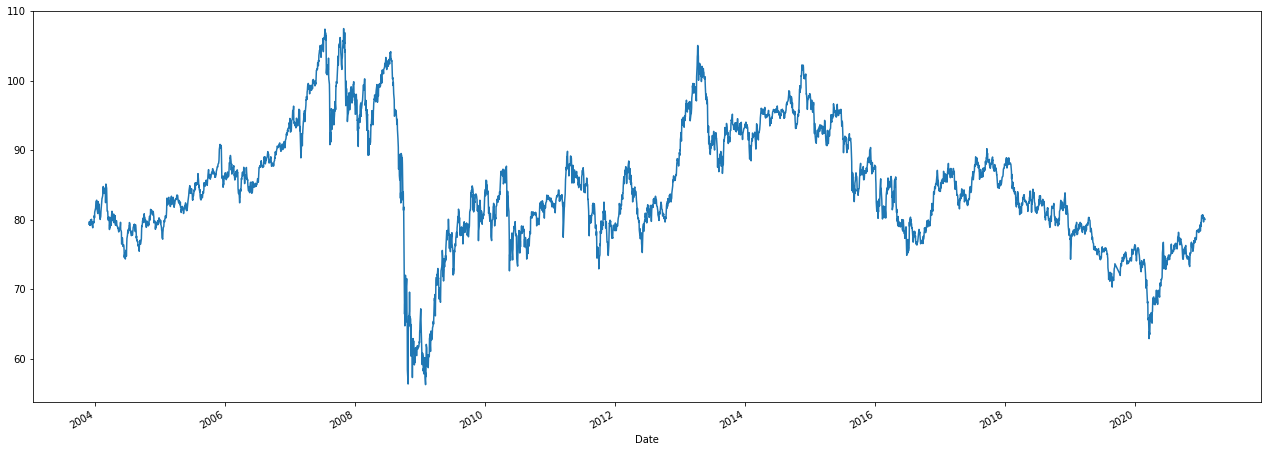

In [124]:
ativo['Close'].plot(figsize=(22,8))

In [125]:
resultado = []
for i in range(0, len(ativo)):
  if ativo['Close'][i] > ativo['Open'][i]:
    resultado.append(1)
  else:
    resultado.append(0)

In [126]:
resultado.pop(0)
resultado.append('Espera')
ativo['Resultado'] = resultado

In [127]:
ativo = ativo.dropna()
ativo['MM10'] = ativo['MM10'] / ativo['Close']
ativo['MM20'] = ativo['MM20'] / ativo['Close']
ativo['MM100'] = ativo['MM100'] / ativo['Close']
ativo['MM200'] = ativo['MM200'] / ativo['Close']
ativo['Close'] = ativo['Close'] / ativo['Open']
ativo['Low'] = ativo['Low'] / ativo['Open']
ativo['High'] = ativo['High'] / ativo['Open']
ativo['Open'] = ativo['Open'] / ativo['Open']
ativo

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,High,Low,Open,Close,MM10,MM20,MM100,MM200,Resultado
Date,,,,,,,,,
2004-09-02,1.003854,0.992239,1.0,1.001141,1.008920,1.021969,1.021853,1.042869,0
2004-09-05,1.000131,0.994373,1.0,0.997893,1.007882,1.021567,1.022730,1.044169,0
2004-09-06,1.001311,0.991991,1.0,0.993171,1.012289,1.025850,1.028794,1.050654,1
2004-09-07,1.006689,0.994683,1.0,1.005027,1.004957,1.018493,1.022891,1.044849,0
2004-09-08,1.000276,0.987578,1.0,0.991124,1.012104,1.025446,1.031658,1.054184,1
...,...,...,...,...,...,...,...,...,...
2021-01-21,1.002715,0.999452,1.0,1.000199,0.999910,0.992790,0.957347,0.935957,1
2021-01-22,1.001619,0.994895,1.0,1.000162,0.999323,0.993596,0.957578,0.936499,1
2021-01-25,1.003347,0.996303,1.0,1.000037,1.002192,0.997543,0.960948,0.940209,1


In [128]:
previsores = ativo.iloc[:len(ativo)-1,0:8]
classe = ativo.iloc[:len(ativo)-1,8]
classe = classe.astype('int')

In [129]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)
previsores

array([[-0.25942983, -0.20014718,  0.        , ...,  0.8988126 ,
         0.32048133,  0.45122243],
       [-0.78952696,  0.05426245,  0.        , ...,  0.88210638,
         0.33493376,  0.46678712],
       [-0.62154224, -0.22973878,  0.        , ...,  1.06022249,
         0.43486777,  0.54441761],
       ...,
       [-0.57768507,  0.11645587,  0.        , ..., -0.28120671,
        -0.73881346, -0.82201425],
       [-0.33159927,  0.28434675,  0.        , ..., -0.11703307,
        -0.68327978, -0.77760483],
       [-0.26554933,  0.10388439,  0.        , ..., -0.07647202,
        -0.67600062, -0.76755476]])

In [130]:
from sklearn.model_selection import train_test_split
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.15, random_state=0)

In [131]:
from sklearn.neural_network import MLPClassifier
classificador = MLPClassifier(verbose=True, max_iter=1000, tol=0.0000010, hidden_layer_sizes=(5, 5))
classificador.fit(previsores_treinamento, classe_treinamento)
previsoes = classificador.predict(previsores_teste)

Iteration 1, loss = 0.80399634
Iteration 2, loss = 0.77169973
Iteration 3, loss = 0.75010483
Iteration 4, loss = 0.73444424
Iteration 5, loss = 0.72305506
Iteration 6, loss = 0.71626625
Iteration 7, loss = 0.71189685
Iteration 8, loss = 0.70764059
Iteration 9, loss = 0.70517775
Iteration 10, loss = 0.70322335
Iteration 11, loss = 0.70148049
Iteration 12, loss = 0.69991310
Iteration 13, loss = 0.69850901
Iteration 14, loss = 0.69726870
Iteration 15, loss = 0.69620429
Iteration 16, loss = 0.69538191
Iteration 17, loss = 0.69488865
Iteration 18, loss = 0.69444000
Iteration 19, loss = 0.69408902
Iteration 20, loss = 0.69376189
Iteration 21, loss = 0.69341382
Iteration 22, loss = 0.69317642
Iteration 23, loss = 0.69285591
Iteration 24, loss = 0.69269081
Iteration 25, loss = 0.69253319
Iteration 26, loss = 0.69239686
Iteration 27, loss = 0.69213393
Iteration 28, loss = 0.69197082
Iteration 29, loss = 0.69179819
Iteration 30, loss = 0.69164346
Iteration 31, loss = 0.69150841
Iteration 32, los

In [132]:
from sklearn.metrics import confusion_matrix, accuracy_score
precisao = accuracy_score(classe_teste, previsoes)
matriz = confusion_matrix(classe_teste, previsoes)

In [133]:
print(precisao)
print(matriz)

0.5188087774294671
[[107 190]
 [117 224]]


In [134]:
# Conclusão: entre 48% e 53%

In [135]:
teste1 = classificador.predict(mais_recente)

In [136]:
teste1

array([0])